In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',21)

In [2]:
lol = pd.read_csv('lol.csv')
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
print(f'Total shape {lol.shape}')
print(f'All columns: {", ".join(lol.columns.values)}')

Total shape (9879, 40)
All columns: gameId, blueWins, blueWardsPlaced, blueWardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueAssists, blueEliteMonsters, blueDragons, blueHeralds, blueTowersDestroyed, blueTotalGold, blueAvgLevel, blueTotalExperience, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, blueExperienceDiff, blueCSPerMin, blueGoldPerMin, redWardsPlaced, redWardsDestroyed, redFirstBlood, redKills, redDeaths, redAssists, redEliteMonsters, redDragons, redHeralds, redTowersDestroyed, redTotalGold, redAvgLevel, redTotalExperience, redTotalMinionsKilled, redTotalJungleMinionsKilled, redGoldDiff, redExperienceDiff, redCSPerMin, redGoldPerMin


In [4]:
lol.describe(include="all")

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


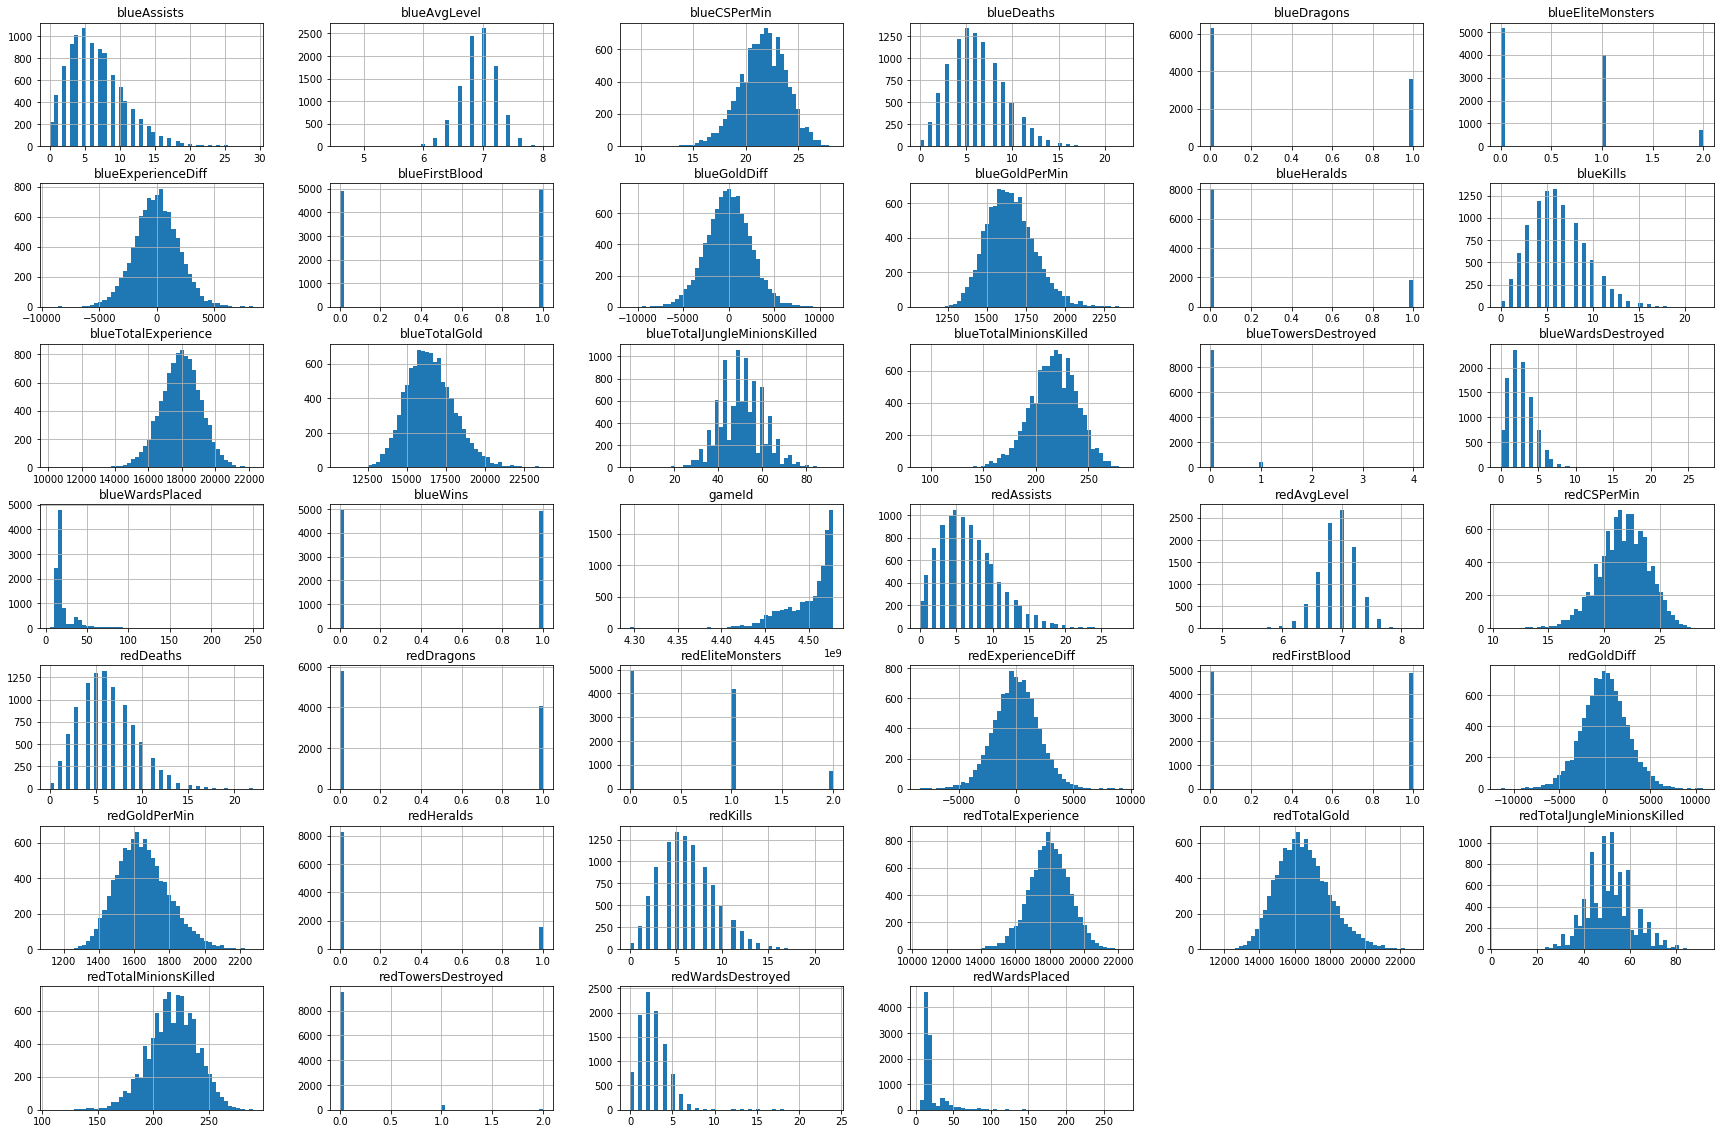

In [5]:
lol.hist(bins = 50,figsize=(30,20))
plt.savefig('./lol.png')
plt.show()

In [6]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [7]:
#Мы посмотрели на распределение значений в данных, увидели, что пропуски отсутствуют. 

#Теперь нужно убрать ненужные столбцы, которые не должны повлиять на результат, или (почти) аналогичны другим столбцам.
lol_clean = lol.copy()

cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
lol_clean = lol_clean.drop(cols, axis = 1)

In [8]:
lol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
redWardsPlaced                  9879 non-null int64
redWardsDestroyed               9879 non-null int64
redDeat

C:\Users\Anku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


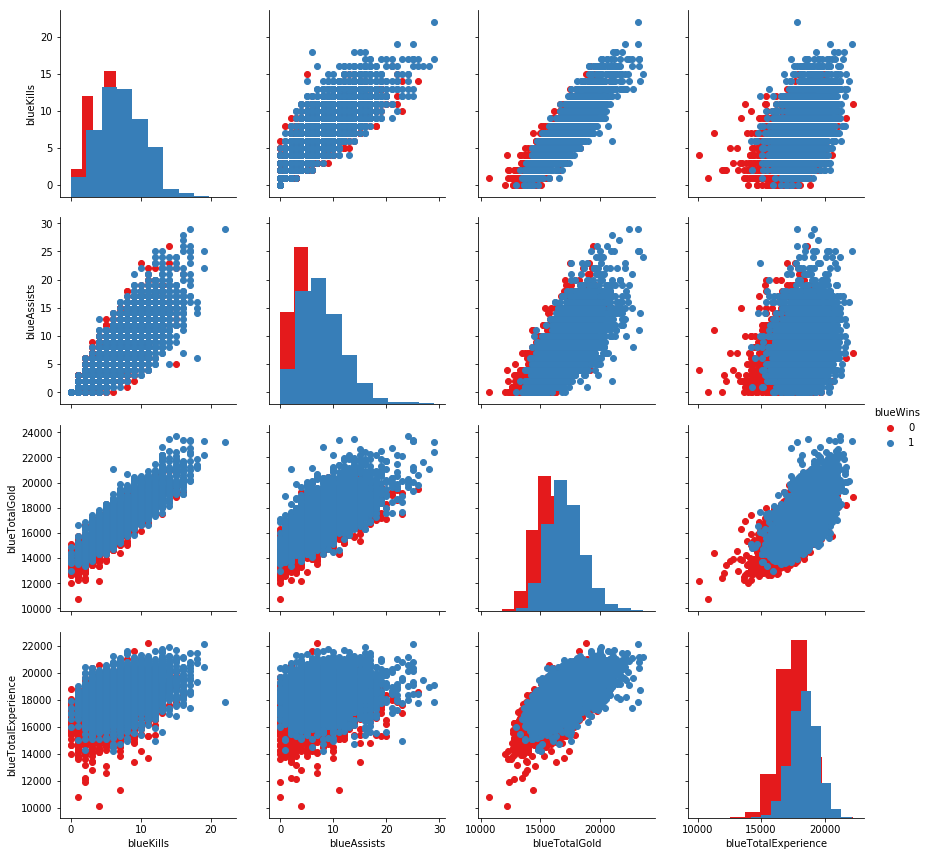

In [9]:
#Проверим взяимосвязи между частью параметров синей команды
g = sns.PairGrid(data=lol_clean, vars=['blueKills', 'blueAssists', 'blueTotalGold', 'blueTotalExperience'], hue='blueWins', size=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();




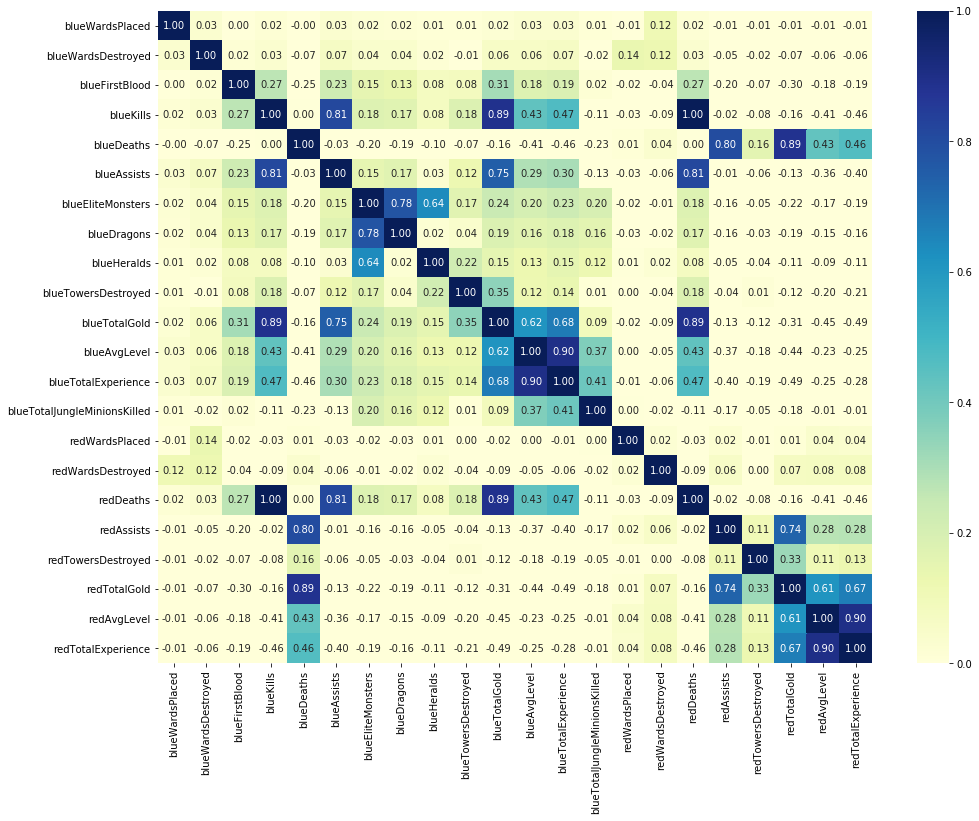

In [10]:
#Получим корреляционную матрицу
plt.figure(figsize=(16, 12))
sns.heatmap(lol_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [11]:
#Основывая на этой матрице, уберем еще параметры.
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
lol_clean = lol_clean.drop(cols, axis=1)

lol_clean.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueTotalExperience,blueTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,0,17210,17039,36
1,0,12,1,0,5,5,5,0,0,0,0,14712,16265,43
2,0,15,0,0,7,11,4,1,1,0,0,16113,16221,46
3,0,43,1,0,4,5,5,1,0,1,0,15157,17954,55
4,0,75,4,0,6,6,6,0,0,0,0,16400,18543,57


In [12]:
#Уберем еще столбцы, мало коррелирующие с победами синей команды

corr_matrix = lol_clean.corr()
corr_matrix["blueWins"].sort_values(ascending=False)

blueWins                        1.000000
blueTotalGold                   0.417213
blueTotalExperience             0.396141
blueKills                       0.337358
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
blueDeaths                     -0.339297
Name: blueWins, dtype: float64

In [13]:
#Выведем финальный набор данных
cols = ['blueWardsPlaced','blueWardsDestroyed','blueHeralds','blueTowersDestroyed','blueTotalJungleMinionsKilled',]
lol_clean = lol_clean.drop(cols, axis=1)

lol_clean.head()

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,0,1,9,6,11,0,0,17210,17039
1,0,0,5,5,5,0,0,14712,16265
2,0,0,7,11,4,1,1,16113,16221
3,0,0,4,5,5,1,0,15157,17954
4,0,0,6,6,6,0,0,16400,18543


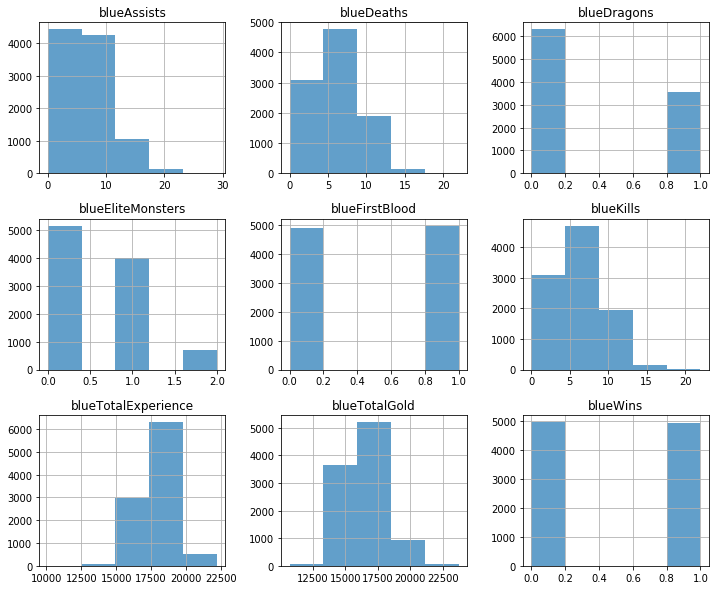

In [14]:
#Посмотрим распределение данных в финальном наборе
lol_clean.hist(alpha = 0.7, figsize=(12,10), bins=5);

In [15]:
lol_clean.nunique()

blueWins                  2
blueFirstBlood            2
blueKills                21
blueDeaths               21
blueAssists              30
blueEliteMonsters         3
blueDragons               2
blueTotalGold          4739
blueTotalExperience    4143
dtype: int64

In [16]:
#Результирующее описание
lol_clean.describe(include="all")

,blueWins,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,16503.455512,17928.110133
std,0.500024,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,1535.446636,1200.523764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,10098.000000
25%,0.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,15415.500000,17168.000000
50%,0.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,16398.000000,17951.000000
75%,1.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,17459.000000,18724.000000
max,1.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,23701.000000,22224.000000


In [17]:
lol_clean.to_csv('lol_clean.csv')